In [139]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
import statistics
from sklearn.metrics import confusion_matrix

In [140]:
shower_dp = 'data/Showerthoughts.csv'
shower_data = pd.read_csv(shower_dp,header=0)
shower_data.head()

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.372964e+09,2785,self.Showerthoughts,1hncvt,"If Hillary Clinton wins in 2016, it will be th...",4750,1965,265,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hncvt,http://www.reddit.com/r/Showerthoughts/comment...,NaN
1,1.372606e+09,2488,self.Showerthoughts,1hd8in,I am just a penis. The rest of me is just ther...,4011,1523,162,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hd8in,http://www.reddit.com/r/Showerthoughts/comment...,NaN
2,1.361920e+09,2387,self.Showerthoughts,19aft0,A TV channel where all the shows are set in th...,2558,171,77,http://www.reddit.com/r/Showerthoughts/comment...,"You could have crime drama's, sitcoms, science...",...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_19aft0,http://www.reddit.com/r/Showerthoughts/comment...,NaN
3,1.370793e+09,2038,self.Showerthoughts,1fzgzv,If the oldest person on earth is 116 years old...,2559,521,71,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1fzgzv,http://www.reddit.com/r/Showerthoughts/comment...,NaN
4,1.371846e+09,2007,self.Showerthoughts,1gte67,"If Kanye and Kim's child's name is North West,...",2687,680,76,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1gte67,http://www.reddit.com/r/Showerthoughts/comment...,NaN


In [141]:
shower_data = shower_data.drop(['domain','permalink', 'over_18','link_flair_css_class',
       'author_flair_css_class', 'selftext','thumbnail', 'name', 'url', 'link_flair_text','distinguished'], axis='columns')

shower_data["engagement"] = shower_data["ups"] + shower_data["downs"] + shower_data["num_comments"]

In [142]:
tweets = shower_data['title']

targets = np.array(shower_data['ups'])
eng_targets = np.array(shower_data["engagement"])

In [143]:
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

 # config values// Beginning of word embeddings
embed_size = 300 # how big is each word vector
max_features = 50000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 25 # max number of words in a question to use


tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(tweets)
tweets = tokenizer.texts_to_sequences(tweets)


tweets = pad_sequences(tweets, maxlen=maxlen)
print(len(tweets))
text_df = pd.DataFrame(tweets, shower_data["id"] )
shower_data = shower_data.merge(text_df, how='left', on='id')


1000


In [144]:
print(shower_data)

      created_utc  score      id  \
0    1.372964e+09   2785  1hncvt   
1    1.372606e+09   2488  1hd8in   
2    1.361920e+09   2387  19aft0   
3    1.370793e+09   2038  1fzgzv   
4    1.371846e+09   2007  1gte67   
..            ...    ...     ...   
995  1.376188e+09     66  1k4gko   
996  1.375852e+09     64  1jv5ie   
997  1.374782e+09     65  1j1rks   
998  1.374438e+09     62  1irmmp   
999  1.374139e+09     61  1ijrk9   

                                                 title   ups  downs  \
0    If Hillary Clinton wins in 2016, it will be th...  4750   1965   
1    I am just a penis. The rest of me is just ther...  4011   1523   
2    A TV channel where all the shows are set in th...  2558    171   
3    If the oldest person on earth is 116 years old...  2559    521   
4    If Kanye and Kim's child's name is North West,...  2687    680   
..                                                 ...   ...    ...   
995  Deaf people using captions to watch TV have no...    75      9   

In [91]:

shower_data['embedded_titles'] = pd.Series(tweets.tolist())

features = shower_data[['downs', 'num_comments', 'score', 'embedded_titles']]
shower_data['embedded_titles'].iloc[25]
features_notTitle = shower_data[['downs', 'created_utc']]

0.25    109.0
0.50    174.5
0.75    391.5
Name: ups, dtype: float64
70 4750 363.546 174.5


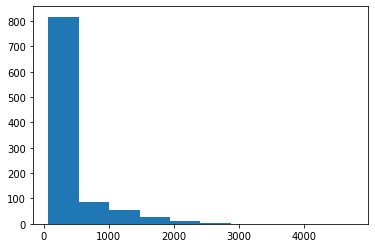

In [79]:
import matplotlib.pyplot as plt
print(shower_data['ups'].quantile([0.25,0.5,0.75]))


large = []
for targ in targets:
    if targ > 2000:
        large.append(targ)
plt.hist(targets, bins = 10)
print(targets.min(), targets.max(), targets.mean(), statistics.median(targets))
plt.show()

In [53]:
targets
def make_target_buckets(targets):
    new_targets = []
    for t in targets:
        if t > 392:
            new_targets.append(4)
        elif t > 175:
            new_targets.append(3)
        elif t > 109:
            new_targets.append(2) 
        else:
            new_targets.append(1)
    return new_targets
stat_targ_buckets = make_target_buckets(targets)
   

In [54]:
targets
def make_target_buckets(targets):
    new_targets = []
    for t in targets:
        if t > 400:
            new_targets.append(4)
        elif t > 150:
            new_targets.append(3)
        elif t > 100:
            new_targets.append(2) 
        else:
            new_targets.append(1)
    return new_targets
targ_buckets = make_target_buckets(targets)
        

In [55]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(features)
# features = scaler.transform(features)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(features_notTitle, targ_buckets, test_size=.2, train_size=.8, random_state=None, shuffle=True, stratify=None)
statX_train, statX_test, staty_train, staty_test = train_test_split(features_notTitle, stat_targ_buckets, test_size=.2, train_size=.8, random_state=None, shuffle=True, stratify=None)

0.27


<AxesSubplot:>

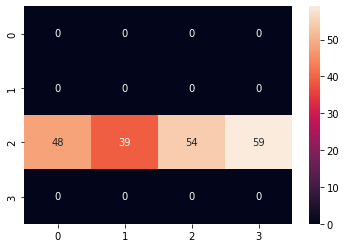

In [146]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0).fit(X_train, y_train)
preds = logReg.predict(X_test)
logReg.score(X_test, y_test)

print(logReg.score(X_test, y_test))
rfcCM = confusion_matrix(preds, y_test)
sns.heatmap(rfcCM, annot=True)

0.23


<AxesSubplot:>

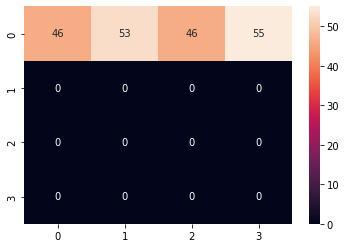

In [60]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0).fit(statX_train, staty_train)
preds = logReg.predict(statX_test)

print(logReg.score(statX_test, staty_test))
rfcCM = confusion_matrix(preds, staty_test)
sns.heatmap(rfcCM, annot=True)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
features_poly = poly.fit_transform(features_notTitle)

0.625


<AxesSubplot:>

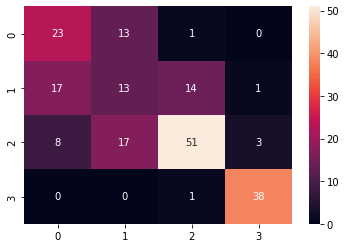

In [16]:
#RFC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import seaborn as sns
ax= plt.subplot()

clf = RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(X_train, y_train)
preds2 = clf.predict(X_test)
print(accuracy_score(y_test, preds2))

rfcCM = confusion_matrix(y_test, preds2)
sns.heatmap(rfcCM, annot=True)

0.67


<AxesSubplot:>

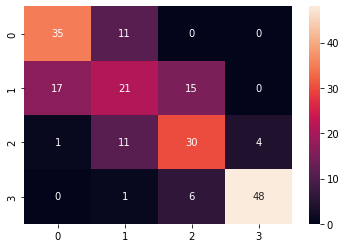

In [68]:
clf = RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(statX_train, staty_train)
preds2 = clf.predict(statX_test)
print(accuracy_score(staty_test, preds2))

rfcCM = confusion_matrix(staty_test, preds2)
sns.heatmap(rfcCM, annot=True)

0.395


<AxesSubplot:>

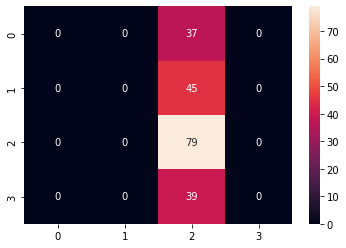

In [25]:
from sklearn.svm import SVC
clf= SVC(gamma='auto', C= 20)
clf.fit(X_train, y_train)
preds2 = clf.predict(X_test)
print(accuracy_score(y_test, preds2))
rfcCM = confusion_matrix(y_test, preds2)
sns.heatmap(rfcCM, annot=True)

0.23


<AxesSubplot:>

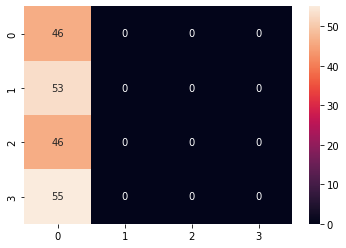

In [67]:
from sklearn.svm import SVC
clf= SVC(gamma=.12, C= .00001)
clf.fit(statX_train, staty_train)

preds2 = clf.predict(statX_test)
print(accuracy_score(staty_test, preds2))
rfcCM = confusion_matrix(staty_test, preds2)
sns.heatmap(rfcCM, annot=True)